First load the xlsx nutzerdata without chinese as this dataset is already prepared with only using sentences from companies and we removed all data that contains non roman letters and foreign languages.

In [2]:
%pip install -U imbalanced-learn
%pip install git+https://github.com/scikit-learn-contrib/imbalanced-learn.git@master

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 4.2 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.
  Cloning https://github.com/scikit-learn-contrib/imbalanced-learn.git (to revision master) to /private/var/folders/xs/1mhprzwx46939b9pzllqkp3m0000gn/T/pip-req-build-lgh29dgv
  Running command git clone --filter=blob:none --quiet https://github.com/scikit-learn-contrib/imbalanced-learn.git /private/var/folders/xs/1mhprzwx46939b9pzllqkp3m0000gn/T/pip-req-build-lgh29dgv
  Resolved https://github.com/scikit-learn-contrib/imbalanced-learn.git to commit 2b6269f9aaea5f058606bf318b8bc36150137dd6
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for imbalanced-learn: filename=imbalanced_learn-0.13.0.dev0-py3-none-any.whl size=258373 sha256=dd1216d1114cade31e6895346484cb452ae48f24fbaf439fe037a9be6fd5e

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler

In [20]:
data = pd.read_excel('datasets/5-removed-lines-with-url.xlsx')

In [21]:
string_lengths = data['end_target_text_sanitized'].str.len()
string_length_distribution = string_lengths.value_counts()
string_length_distribution, len(data)

(end_target_text_sanitized
 78     18
 33     14
 127    12
 56     11
 57     11
        ..
 500     1
 700     1
 355     1
 662     1
 479     1
 Name: count, Length: 448, dtype: int64,
 1435)

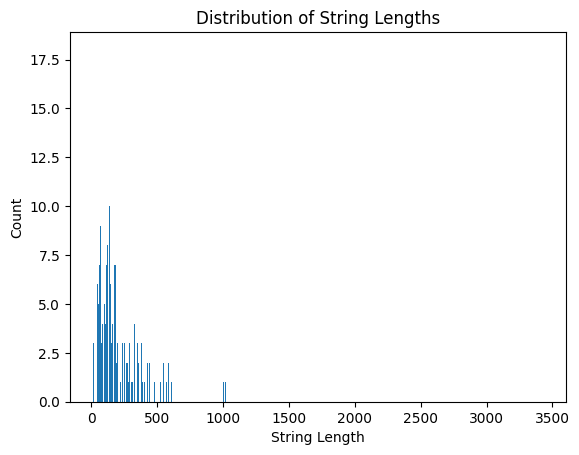

In [22]:
plt.bar(string_length_distribution.index, string_length_distribution.values)
plt.xlabel('String Length')
plt.ylabel('Count')
plt.title('Distribution of String Lengths')
plt.show()

In [23]:
data['end_target'].value_counts(), string_lengths.describe()

(end_target
 Net zero                      758
 Carbon neutral(ity)           274
 Emissions reduction target    220
 Climate neutral                46
 Emissions intensity target     41
 Other                          26
 Science-based target           25
 Zero emissions                 13
 Zero carbon                     8
 1.5°C target                    7
 Climate positive                6
 Carbon negative                 6
 Absolute emissions target       2
 Net negative                    1
 GHG neutral(ity)                1
 No target                       1
 Name: count, dtype: int64,
 count    1435.000000
 mean      200.160279
 std       185.712671
 min         9.000000
 25%        87.000000
 50%       153.000000
 75%       257.500000
 max      3432.000000
 Name: end_target_text_sanitized, dtype: float64)

In [24]:
data['end_target'].value_counts(), string_lengths.describe()

(end_target
 Net zero                      758
 Carbon neutral(ity)           274
 Emissions reduction target    220
 Climate neutral                46
 Emissions intensity target     41
 Other                          26
 Science-based target           25
 Zero emissions                 13
 Zero carbon                     8
 1.5°C target                    7
 Climate positive                6
 Carbon negative                 6
 Absolute emissions target       2
 Net negative                    1
 GHG neutral(ity)                1
 No target                       1
 Name: count, dtype: int64,
 count    1435.000000
 mean      200.160279
 std       185.712671
 min         9.000000
 25%        87.000000
 50%       153.000000
 75%       257.500000
 max      3432.000000
 Name: end_target_text_sanitized, dtype: float64)

No we drop every coloum where the end_target is not in end_target_text_extended and the end_target_year is not none

In [25]:
df = pd.DataFrame(data)

# Check if a year is in the end target text. Otherwise it cant be an end target text
# If endtarget is not a year it does not need to have a year.
def contains_year(row):
    if row['end_target_year'] == 'none':
        return True
    return str(row['end_target_year']) in str(row['end_target_text_sanitized'])

# Apply the function to the dataframe
filtered_df = df[df.apply(contains_year, axis=1)]

print(filtered_df['end_target_text_sanitized'])

2       Grupo Bimbo, the largest baking company in the...
4       Aim to achieve Net Zero by 2040.\nAlso aiming ...
5       In March of 2021, we set two near-term climate...
6       RBI has set a target to achieve net zero emiss...
7       Now, we are working to achieve our goal to be ...
                              ...                        
1428    By 2025, Meijer will reduce absolute carbon em...
1429    Our INEOS businesses are developing roadmaps t...
1430    Globally, we are committed to achieving net ze...
1431    net zero by 2050 in our Scopes 1, 2, and 3 emi...
1432    We will achieve Net Zero Emissions in our own ...
Name: end_target_text_sanitized, Length: 1291, dtype: object


Drop everything less than 50

In [26]:
value_counts = filtered_df['end_target'].value_counts()
filtered_values = value_counts[value_counts >= 50].index
filtered_data = filtered_df[filtered_df['end_target'].isin(filtered_values)]
filtered_data['end_target'].value_counts(), string_lengths.describe()

(end_target
 Net zero                      706
 Carbon neutral(ity)           246
 Emissions reduction target    190
 Name: count, dtype: int64,
 count    1435.000000
 mean      200.160279
 std       185.712671
 min         9.000000
 25%        87.000000
 50%       153.000000
 75%       257.500000
 max      3432.000000
 Name: end_target_text_sanitized, dtype: float64)

In [27]:
filtered_data.to_excel('datasets/6-removed-everything-with-no-date-in-sanitzied-and-removed-classes-less-50.xlsx', index=False)